In [134]:
using Oceananigans
using JLD2
using CairoMakie
using Statistics
using SpecialFunctions

In [173]:
foldername = "../scratch/filament-instability/default_square"
filename = "down_front_mean_square.jld2"
filenamedfm = "down_front_mean.jld2"

"down_front_mean.jld2"

In [174]:
frames = jldopen("$foldername/$filename") do file
    keys(file["timeseries/t"])
    end;

In [188]:
# Read timeseries
iter = 500
field = "u"
fieldtimeseries = FieldTimeSeries("$foldername/$filename", "$(field)_sq"; iterations=frames[iter:iter])
fieldtimeseriesdfm = FieldTimeSeries("$foldername/$filenamedfm", "$(field)_dfm"; iterations=frames[iter:iter])

xs = Array(xnodes(Center, fieldtimeseries.grid))
zs = Array(znodes(Face, fieldtimeseries.grid))
fieldtimeseriesdfm

1024×1×64×1 FieldTimeSeries{InMemory} located at (Face, ⋅, Center) on CPU
├── grid: 1024×1024×64 RectilinearGrid{Float64, Periodic, Periodic, Bounded} on CPU with 3×3×3 halo
├── indices: (1:1024, Colon(), 1:64)
└── data: 1024×1×64×1 OffsetArray(::Array{Float64, 4}, 1:1024, 1:1, 1:64, 1:1) with eltype Float64 with indices 1:1024×1:1×1:64×1:1
    └── max=0.10098, min=-0.10254, mean=-1.78272e-6

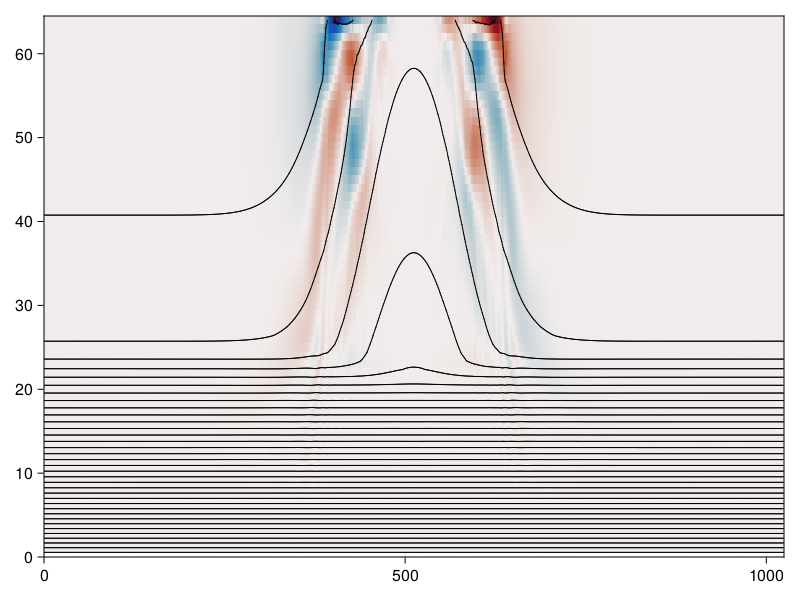

In [189]:
plt_data = (interior(fieldtimeseries, :, 1, :, 1) .- mean(interior(fieldtimeseriesdfm, :, 1, :, 1) .^2))
plt_data = interior(fieldtimeseriesdfm, :, 1, :, 1)
#plt_data_cont = plt_data
sym_range = maximum(abs.(plt_data))
#sym_range = 1
#interior(fieldtimeseriesdfm, :, 1, :, 1) .^2
fig, ax, ht = heatmap(plt_data; colormap=:balance, colorrange=(-sym_range, sym_range))
contour!(ax, plt_data_cont, color=:black, levels=35)
fig